# Python import

In [2]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
np.random.seed(seed=1)

# Vectorization

The previous tutorial described a very simple neural network with only one input, one hidden neuron and one output. This tutorial will describe a neural network that takes 2-dimensional input samples, projects them onto a 3-dimensional hidden layer, and classifies them with a 2-dimensional softmax output classfier, this softmax function is explained in intermezzo 2 . While we didn't add the bias parameters to the previous 2 models, we will add them to this model. We will work out the vector computations needed to optimize and run this neural network

# Define the dataset

In [3]:
X, t = sklearn.datasets.make_circles(n_samples=100, shuffle=False, factor=0.3, noise=0.1)
T = np.zeros((100, 2))
T[t==1, 1] = 1
T[t==0, 0] = 1

# Seperate the red and blue points for plotting
x_red = X[t==0]
x_blue = X[t==1]

print('shape of X: {}'.format(X.shape))
print('shape of T: {}'.format(T.shape))

shape of X: (100, 2)
shape of T: (100, 2)


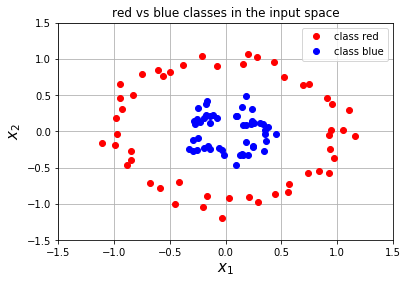

In [4]:
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()

# Define computation functinos

In [5]:
# define the logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# define the sotfmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def hidden_activations(X, wh, bh):
    return logistic(X.dot(wh)+bh)

def output_activations(H, wo, bo):
    return softmax(H.dot(wo)+bo)

def nn(X, wh, bh, wo, bo):
    return output_activations(hidden_activations(X, wh, bh), wo, bo)

def nn_predict(X, wh, bh, wo, bo):
    return np.around(nn(X, wh, bh, wo, bo))